![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

     culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0                39.1             18.7  ...           0         1
1                39.5             17.4  ...           1         0
2                40.3             18.0  ...           1         0
3                36.7             19.3  ...           1         0
4                39.3             20.6  ...           0         1
..                ...              ...  ...         ...       ...
327              47.2             13.7  ...           1         0
328              46.8             14.3  ...           1         0
329              50.4             15.7  ...           0         1
330              45.2             14.8  ...           1         0
331              49.9             16.1  ...           0         1

[332 rows x 6 columns]
Dados padronizados:
     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0           -0.903906         0.790360          -1.425342    -0.566948
1           -0.830434 

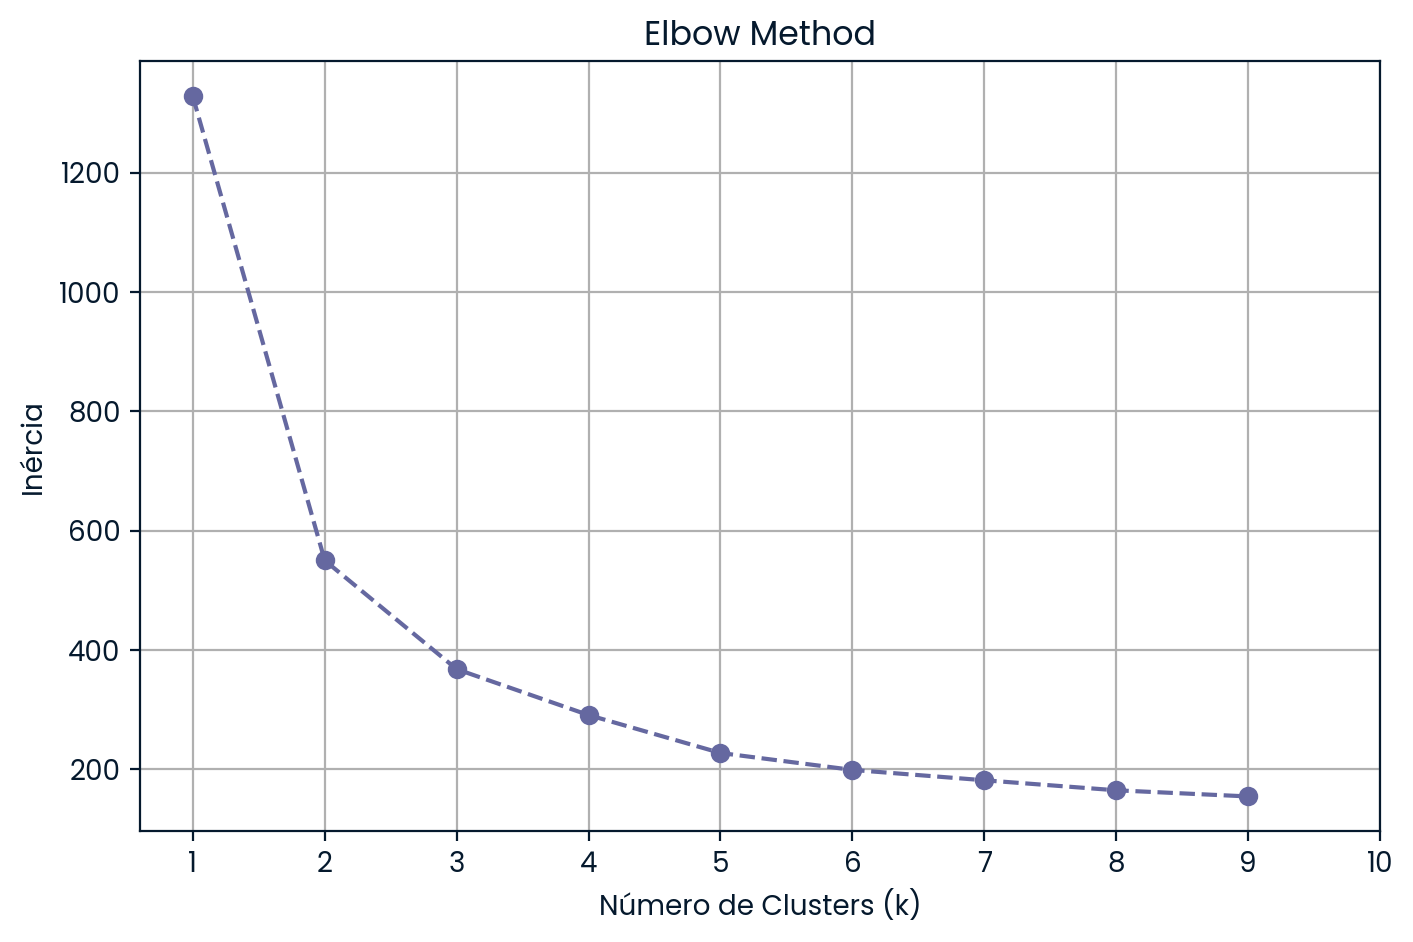

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  Cluster
0         -0.903906         0.790360          -1.425342    -0.566948        2
1         -0.830434         0.126187          -1.068577    -0.504847        2
2         -0.683490         0.432728          -0.426399    -1.187953        2
3         -1.344738         1.096901          -0.569105    -0.939551        2
4         -0.867170         1.761074          -0.783164    -0.691149        2


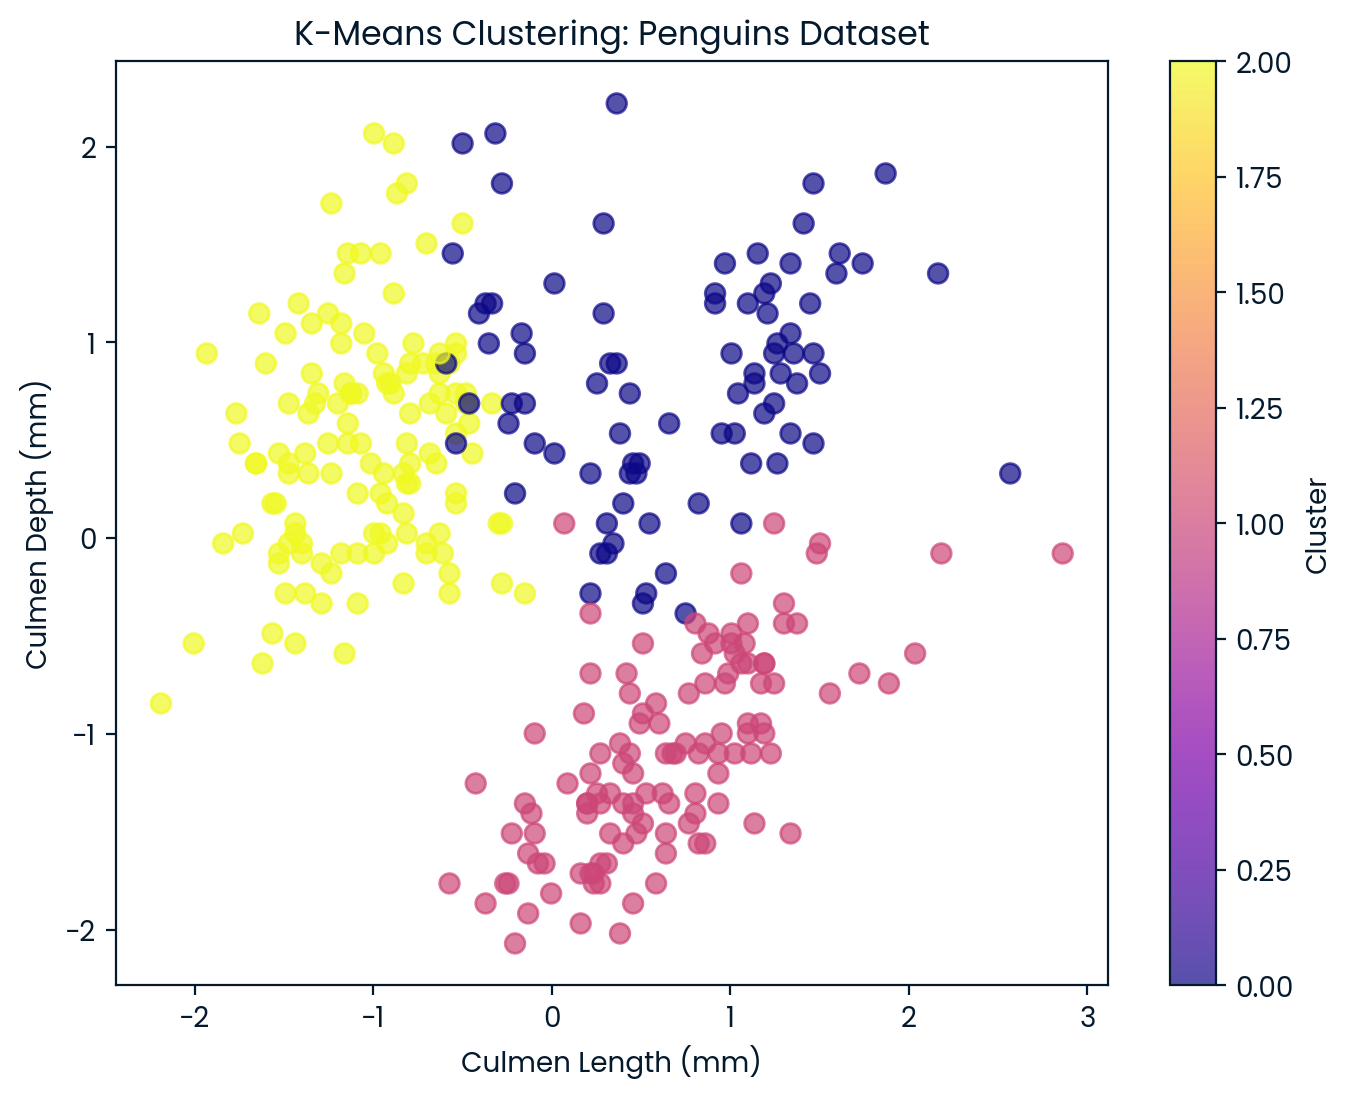

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             47.662353        18.748235         196.917647  3898.235294
1             47.568067        14.996639         217.235294  5092.436975
2             38.305469        18.098437         188.554688  3587.500000


In [27]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

#  Converter var cartegoricas em var dummy(indicadoras). Transforma os valores categ em colunas separadas atrib 1 ou 0 p a presenca de cada categ
df_dummies = pd.get_dummies(penguins_df, columns=['sex'], drop_first=False)
print(df_dummies)

# Iniciando o scaler(padronizando os dados p que tenha media 0 e desvio paddrao 1)
scaler = StandardScaler()

# Selecionando apenas colunas numéricas
numeric_columns = df_dummies.select_dtypes(include=['float64', 'int64']).columns
# aplicar a padronizacao somente as colunas numericas
scaled_data = scaler.fit_transform(df_dummies[numeric_columns])

# transf o resul em um novo DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)
print("Dados padronizados:")
print(scaled_df)

#criando lista p armz as inercias(soma das distancias quadraticas)
inertia = []
# testando diferentes numeros de clusters
for k in range(1, 10): #1 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42) # inicializando o k-means
    kmeans.fit(scaled_df) # ajustando o modelo aos dados
    inertia.append(kmeans.inertia_) # salvando a inercia do model

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

# Num identificando no grafico
optimal_k = 3

# exec. kmeans c/ o num
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# ajusta o model aos dados
kmeans.fit(scaled_df)

# adc as etiquetas dos clusters
scaled_df['Cluster'] = kmeans.labels_

# visualiz. os primeiros dados c/ etiquetas
print(scaled_df.head())

# plot os clusters na dispersao
plt.figure(figsize=(8, 6))

# usando as var para visualizacao
plt.scatter(scaled_df['culmen_length_mm'], 
            scaled_df['culmen_depth_mm'], 
            c=kmeans.labels_,
            cmap='plasma',# Escolher um mapa de cores
            s=50, alpha=0.7)

plt.title('K-Means Clustering: Penguins Dataset')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.colorbar(label='Cluster')
plt.show()

# Criar a lista c/ os nomes das colunas numéricas
numeric_columns = penguins_df.select_dtypes(include=['float64', 'int64']).columns

# Adc a coluna 'label' ao df c/ os rótulos do K-Means
penguins_df['label'] = kmeans.labels_

# Agrupar os dados por 'label' e cal a mean das col num
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()

# Exibir a tabela 
print(stat_penguins)

pt-br: Apliquei o algoritmo K-means para identificar grupos distintos com base nas características físicas dos pinguins, como comprimento e profundidade do bico. Não ha informações sobre as espécies para que possa defini-las.
en-us: I applied the K-means algorithm to identify distinct groups based on the physical characteristics of the penguins, such as beak length and depth. There is no information about the species, so they cannot be defined.